In [1]:
import uproot

the file here is a part of `data18_13TeV.periodAllYear.physics_Main.PhysCont.DAOD_PHYSLITE.grp18_v01_p6026`:
```
/data/alheld/200gbps-atlas/data18_13TeV.periodAllYear.physics_Main.PhysCont.DAOD_PHYSLITE.grp18_v01_p6026/DAOD_PHYSLITE.37021624._000036.pool.root.1
```

In [2]:
! ls -lh /data/alheld/200gbps-atlas/data18_13TeV.periodAllYear.physics_Main.PhysCont.DAOD_PHYSLITE.grp18_v01_p6026/DAOD_PHYSLITE.37021624._000036.pool.root.1

-rwxr-xr-x 1 alheld atlas-af 1.1G Apr  7 05:40 /data/alheld/200gbps-atlas/data18_13TeV.periodAllYear.physics_Main.PhysCont.DAOD_PHYSLITE.grp18_v01_p6026/DAOD_PHYSLITE.37021624._000036.pool.root.1


In [3]:
fname = "/data/alheld/200gbps-atlas/data18_13TeV.periodAllYear.physics_Main.PhysCont.DAOD_PHYSLITE.grp18_v01_p6026/DAOD_PHYSLITE.37021624._000036.pool.root.1"
t = uproot.open({fname: "CollectionTree"})

size_per_key_in_MB = {}
cur_size_in_MB = t.file.source.num_requested_bytes/1000**2  # non-zero at the start (some metadata read)

num_branches = len(t.keys())

for i, key in enumerate(t.keys()):
    # if not any([key.startswith(v) for v in ["AnalysisJetsAuxDyn", "AnalysisLargeRJetsAuxDyn", "AnalysisElectronsAuxDyn", "AnalysisMuonsAuxDyn", "AnalysisTauJetsAuxDyn", "AnalysisPhotonsAuxDyn"]]):
    #     continue

    progress = f"{i} / {num_branches}"
    try:
        t.arrays([key])
        print(f"{progress} {key}")
    except:
        print(f"{progress} [CANNOT READ] {key}")
        
    new_size_in_MB = t.file.source.num_requested_bytes/1000**2
    size_per_key_in_MB[key] = new_size_in_MB - cur_size_in_MB
    cur_size_in_MB = new_size_in_MB        

size_per_key_in_MB

0 / 964 [CANNOT READ] xTrigDecisionAux.
1 / 964 [CANNOT READ] xTrigDecisionAux./xTrigDecisionAux.xAOD::AuxInfoBase
2 / 964 xTrigDecisionAux./xTrigDecisionAux.smk
3 / 964 xTrigDecisionAux./xTrigDecisionAux.bgCode
4 / 964 xTrigDecisionAux./xTrigDecisionAux.tav
5 / 964 xTrigDecisionAux./xTrigDecisionAux.tap
6 / 964 xTrigDecisionAux./xTrigDecisionAux.tbp
7 / 964 xTrigDecisionAux./xTrigDecisionAux.lvl2ErrorBits
8 / 964 xTrigDecisionAux./xTrigDecisionAux.efErrorBits
9 / 964 xTrigDecisionAux./xTrigDecisionAux.lvl2Truncated
10 / 964 xTrigDecisionAux./xTrigDecisionAux.efTruncated
11 / 964 xTrigDecisionAux./xTrigDecisionAux.lvl2PassedPhysics
12 / 964 xTrigDecisionAux./xTrigDecisionAux.efPassedPhysics
13 / 964 xTrigDecisionAux./xTrigDecisionAux.lvl2PassedRaw
14 / 964 xTrigDecisionAux./xTrigDecisionAux.efPassedRaw
15 / 964 xTrigDecisionAux./xTrigDecisionAux.lvl2PassedThrough
16 / 964 xTrigDecisionAux./xTrigDecisionAux.efPassedThrough
17 / 964 xTrigDecisionAux./xTrigDecisionAux.lvl2Prescaled
18 / 9

{'xTrigDecisionAux.': 0.010691000000000006,
 'xTrigDecisionAux./xTrigDecisionAux.xAOD::AuxInfoBase': 0.0,
 'xTrigDecisionAux./xTrigDecisionAux.smk': 0.12224499999999994,
 'xTrigDecisionAux./xTrigDecisionAux.bgCode': 0.05617099999999997,
 'xTrigDecisionAux./xTrigDecisionAux.tav': 1.344833,
 'xTrigDecisionAux./xTrigDecisionAux.tap': 2.396336,
 'xTrigDecisionAux./xTrigDecisionAux.tbp': 3.0113660000000007,
 'xTrigDecisionAux./xTrigDecisionAux.lvl2ErrorBits': 0.13372299999999981,
 'xTrigDecisionAux./xTrigDecisionAux.efErrorBits': 0.12920100000000012,
 'xTrigDecisionAux./xTrigDecisionAux.lvl2Truncated': 0.03649500000000039,
 'xTrigDecisionAux./xTrigDecisionAux.efTruncated': 0.03539299999999912,
 'xTrigDecisionAux./xTrigDecisionAux.lvl2PassedPhysics': 0.48871600000000015,
 'xTrigDecisionAux./xTrigDecisionAux.efPassedPhysics': 1.5451639999999998,
 'xTrigDecisionAux./xTrigDecisionAux.lvl2PassedRaw': 0.48687199999999997,
 'xTrigDecisionAux./xTrigDecisionAux.efPassedRaw': 2.844722000000001,
 'xTr

In [4]:
print(f"all branches: {sum(size_per_key_in_MB.values())} MB")  # doesn't include initial metadata read

all branches: 1049.060851 MB


In [5]:
import os
file_size = os.path.getsize(fname) / 1000**2
file_size

1123.430726

In [6]:
t.file.source.num_requested_bytes/1000**2

1051.320857

sanity check: looks like we read most of the file, seems good

In [7]:
import json

size_per_key_in_MB["_file_size"] = file_size

with open("branch_sizes.json", "w") as f:
    f.write(json.dumps(size_per_key_in_MB, sort_keys=True, indent=4))

## sort branches, find branches to hit 10% read

In [8]:
import json
import pathlib

size_per_key_in_MB = json.loads(pathlib.Path("branch_sizes.json").read_text())
file_size = size_per_key_in_MB["_file_size"]

list_of_branches_to_read = []
size_of_branches = 0

# veto the metadata branch and also possibly problematic ones that could vary a lot across files
branches_to_veto = [
    "_file_size",
    "InDetTrackParticlesAuxDyn.definingParametersCovMatrixOffDiag",
    "InDetTrackParticlesAuxDyn.definingParametersCovMatrixDiag",
    "MuonSpectrometerTrackParticlesAuxDyn.definingParametersCovMatrixOffDiag",
    "AntiKt10UFOCSSKJetsAux./AntiKt10UFOCSSKJetsAux.constituentLinks",
    "ExtrapolatedMuonTrackParticlesAuxDyn.definingParametersCovMatrixOffDiag",
    "CombinedMuonTrackParticlesAuxDyn.definingParametersCovMatrixOffDiag",
    "AnalysisJetsAuxDyn.btaggingLink",
    "AnalysisJetsAuxDyn.GhostTrack",
    "PrimaryVerticesAuxDyn.trackParticleLinks",
    "PrimaryVerticesAuxDyn.neutralParticleLinks"
]

# start with a few hardcoded branches
list_of_branches_to_read = [
    "AnalysisJetsAuxDyn.pt",
    "AnalysisJetsAuxDyn.eta",
    "AnalysisJetsAuxDyn.phi",
    "AnalysisJetsAuxDyn.m",
    "AnalysisElectronsAuxDyn.pt",
    "AnalysisElectronsAuxDyn.eta",
    "AnalysisElectronsAuxDyn.phi",
    "AnalysisElectronsAuxDyn.m",
    "AnalysisMuonsAuxDyn.pt",
    "AnalysisMuonsAuxDyn.eta",
    "AnalysisMuonsAuxDyn.phi",
]
size_of_branches += sum(v for k, v in size_per_key_in_MB.items() if k in list_of_branches_to_read)
    

for k, v in reversed(sorted(size_per_key_in_MB.items(), key=lambda it: it[1])):
    # only keep branches relating to specific physics objects
    if not any([vv in k for vv in [
                "AnalysisJetsAuxDyn",
                "AnalysisElectronsAuxDyn",
                "AnalysisMuonsAuxDyn",
                # "AnalysisPhotonsAuxDyn",
                # "AnalysisTauJetsAuxDyn",
                "PrimaryVerticesAuxDyn"
                ]
            ]):
        continue

    if k in list_of_branches_to_read:
        continue  # already listed in hardcoded branches above
        
    
    if k in branches_to_veto:
        continue

    list_of_branches_to_read.append(k)
    size_of_branches += v
    if size_of_branches / file_size > 0.25:  # target: 25%
        break

print(f"fraction of file read with all these branches: {size_of_branches / file_size:.2%}")

for b in list_of_branches_to_read:
    print(f"{b}: {size_per_key_in_MB[b] / file_size:.2%}")

fraction of file read with all these branches: 25.01%
AnalysisJetsAuxDyn.pt: 0.45%
AnalysisJetsAuxDyn.eta: 0.47%
AnalysisJetsAuxDyn.phi: 0.47%
AnalysisJetsAuxDyn.m: 0.45%
AnalysisElectronsAuxDyn.pt: 0.06%
AnalysisElectronsAuxDyn.eta: 0.06%
AnalysisElectronsAuxDyn.phi: 0.06%
AnalysisElectronsAuxDyn.m: 0.04%
AnalysisMuonsAuxDyn.pt: 0.07%
AnalysisMuonsAuxDyn.eta: 0.07%
AnalysisMuonsAuxDyn.phi: 0.07%
AnalysisJetsAuxDyn.EnergyPerSampling: 3.46%
AnalysisJetsAuxDyn.SumPtTrkPt500: 2.72%
AnalysisJetsAuxDyn.TrackWidthPt1000: 1.51%
PrimaryVerticesAuxDyn.z: 1.17%
PrimaryVerticesAuxDyn.x: 0.96%
PrimaryVerticesAuxDyn.y: 0.94%
AnalysisJetsAuxDyn.NumTrkPt500: 0.92%
AnalysisJetsAuxDyn.NumTrkPt1000: 0.68%
AnalysisJetsAuxDyn.SumPtChargedPFOPt500: 0.53%
AnalysisJetsAuxDyn.Timing: 0.47%
AnalysisJetsAuxDyn.JetConstitScaleMomentum_eta: 0.47%
AnalysisJetsAuxDyn.ActiveArea4vec_eta: 0.47%
AnalysisJetsAuxDyn.DetectorEta: 0.47%
AnalysisJetsAuxDyn.JetConstitScaleMomentum_phi: 0.47%
AnalysisJetsAuxDyn.ActiveArea4ve

In [9]:
# list for notebook doing the reading
list_of_branches_to_read

['AnalysisJetsAuxDyn.pt',
 'AnalysisJetsAuxDyn.eta',
 'AnalysisJetsAuxDyn.phi',
 'AnalysisJetsAuxDyn.m',
 'AnalysisElectronsAuxDyn.pt',
 'AnalysisElectronsAuxDyn.eta',
 'AnalysisElectronsAuxDyn.phi',
 'AnalysisElectronsAuxDyn.m',
 'AnalysisMuonsAuxDyn.pt',
 'AnalysisMuonsAuxDyn.eta',
 'AnalysisMuonsAuxDyn.phi',
 'AnalysisJetsAuxDyn.EnergyPerSampling',
 'AnalysisJetsAuxDyn.SumPtTrkPt500',
 'AnalysisJetsAuxDyn.TrackWidthPt1000',
 'PrimaryVerticesAuxDyn.z',
 'PrimaryVerticesAuxDyn.x',
 'PrimaryVerticesAuxDyn.y',
 'AnalysisJetsAuxDyn.NumTrkPt500',
 'AnalysisJetsAuxDyn.NumTrkPt1000',
 'AnalysisJetsAuxDyn.SumPtChargedPFOPt500',
 'AnalysisJetsAuxDyn.Timing',
 'AnalysisJetsAuxDyn.JetConstitScaleMomentum_eta',
 'AnalysisJetsAuxDyn.ActiveArea4vec_eta',
 'AnalysisJetsAuxDyn.DetectorEta',
 'AnalysisJetsAuxDyn.JetConstitScaleMomentum_phi',
 'AnalysisJetsAuxDyn.ActiveArea4vec_phi',
 'AnalysisJetsAuxDyn.JetConstitScaleMomentum_m',
 'AnalysisJetsAuxDyn.JetConstitScaleMomentum_pt',
 'AnalysisJetsAuxDyn

In [10]:
# code for dask-awkard with coffea schema
for branch in list_of_branches_to_read:
    trans = {"AnalysisJetsAuxDyn": "Jets", "AnalysisMuonsAuxDyn": "Muons", "AnalysisElectronsAuxDyn": "Electrons", "PrimaryVerticesAuxDyn": "PrimaryVertices"}
    for t1, t2 in trans.items():
        branch = branch.replace(t1, t2)
    link_branch_addition = "['m_persIndex']" if "Link" in branch else ""
    print(f"_counter += ak.count_nonzero(events.{branch}{link_branch_addition})")

_counter += ak.count_nonzero(events.Jets.pt)
_counter += ak.count_nonzero(events.Jets.eta)
_counter += ak.count_nonzero(events.Jets.phi)
_counter += ak.count_nonzero(events.Jets.m)
_counter += ak.count_nonzero(events.Electrons.pt)
_counter += ak.count_nonzero(events.Electrons.eta)
_counter += ak.count_nonzero(events.Electrons.phi)
_counter += ak.count_nonzero(events.Electrons.m)
_counter += ak.count_nonzero(events.Muons.pt)
_counter += ak.count_nonzero(events.Muons.eta)
_counter += ak.count_nonzero(events.Muons.phi)
_counter += ak.count_nonzero(events.Jets.EnergyPerSampling)
_counter += ak.count_nonzero(events.Jets.SumPtTrkPt500)
_counter += ak.count_nonzero(events.Jets.TrackWidthPt1000)
_counter += ak.count_nonzero(events.PrimaryVertices.z)
_counter += ak.count_nonzero(events.PrimaryVertices.x)
_counter += ak.count_nonzero(events.PrimaryVertices.y)
_counter += ak.count_nonzero(events.Jets.NumTrkPt500)
_counter += ak.count_nonzero(events.Jets.NumTrkPt1000)
_counter += ak.count_nonzero(

## sanity check: load file again, read these branches, ensure we hit the right fraction of the file

In [11]:
import uproot

fname_local = "/data/alheld/200gbps-atlas/data18_13TeV.periodAllYear.physics_Main.PhysCont.DAOD_PHYSLITE.grp18_v01_p6026/DAOD_PHYSLITE.37021624._000036.pool.root.1"
fname = "root://192.170.240.147//root://fax.mwt2.org:1094//pnfs/uchicago.edu/atlaslocalgroupdisk/rucio/data18_13TeV/36/2c/DAOD_PHYSLITE.37021624._000036.pool.root.1"
treename = "CollectionTree"
t = uproot.open({fname: treename})

cur_size_in_MB = t.file.source.num_requested_bytes/1000**2  # non-zero at the start (some metadata read)

t.arrays(list_of_branches_to_read)

new_size_in_MB = t.file.source.num_requested_bytes/1000**2
print(cur_size_in_MB, new_size_in_MB)

2.260006 283.192324


In [12]:
(new_size_in_MB - cur_size_in_MB) / file_size

0.2500664362281293

## time to read individual branches

In [13]:
import os
import uproot
import time
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use("ggplot")

filter_name = lambda name: name in list_of_branches_to_read

In [14]:
# time each branch individually, compare to size of the branch, ensure no extreme outliers are present
for i in range(len(list_of_branches_to_read)):
    with uproot.open({fname: treename}, filter_name=filter_name) as f:
        initial_metadata_in_MB = f.file.source.num_requested_bytes/1000**2
        t0 = time.perf_counter()
        f[list_of_branches_to_read[i]].array()
        t1 = time.perf_counter()
        new_size_in_MB = f.file.source.num_requested_bytes/1000**2
        time_ms = (t1-t0)*1000
        size_MB = (new_size_in_MB-initial_metadata_in_MB)
        print(f"{list_of_branches_to_read[i]:<80}: {time_ms:4.0f} ms\t\t{size_MB:>5.2f} MB\t\t{size_MB / time_ms * 1000:>5.1f} MB/s")

AnalysisJetsAuxDyn.pt                                                           :   88 ms		 5.03 MB		 57.0 MB/s
AnalysisJetsAuxDyn.eta                                                          :   89 ms		 5.25 MB		 59.1 MB/s
AnalysisJetsAuxDyn.phi                                                          :   88 ms		 5.24 MB		 59.2 MB/s
AnalysisJetsAuxDyn.m                                                            :   90 ms		 5.05 MB		 56.4 MB/s
AnalysisElectronsAuxDyn.pt                                                      :  103 ms		 0.67 MB		  6.5 MB/s
AnalysisElectronsAuxDyn.eta                                                     :  102 ms		 0.68 MB		  6.6 MB/s
AnalysisElectronsAuxDyn.phi                                                     :  101 ms		 0.68 MB		  6.7 MB/s
AnalysisElectronsAuxDyn.m                                                       :  100 ms		 0.43 MB		  4.3 MB/s
AnalysisMuonsAuxDyn.pt                                                          :  103 ms		 0.74 MB		  7

## iteratively reading more branches

In [15]:
file_size = os.path.getsize(fname_local) / 1000**2  # all sizes in MB

time_per_fraction_read = {}
for i in range(len(list_of_branches_to_read)//12+1):
    with uproot.open({fname: treename}, filter_name=filter_name) as f:  # re-open every time for accurate tracking of data read
        branches = list_of_branches_to_read[0:(i+1)*12]
        print(f"reading {len(branches)} branch(es)")
        initial_metadata_in_MB = f.file.source.num_requested_bytes/1000**2
        t0 = time.perf_counter()
        f.arrays(branches)
        t1 = time.perf_counter()
        new_size_in_MB = f.file.source.num_requested_bytes/1000**2
        fraction_read = (new_size_in_MB - initial_metadata_in_MB) / file_size
        time_per_fraction_read[fraction_read] = t1 - t0
        print(f"  - read {new_size_in_MB - initial_metadata_in_MB:.2f} MB in {t1 - t0:.2f} s")

with uproot.open({fname: treename}) as f:
    nevts = f.num_entries

reading 12 branch(es)
  - read 64.08 MB in 2.59 s
reading 24 branch(es)
  - read 191.08 MB in 9.28 s
reading 36 branch(es)
  - read 245.91 MB in 10.28 s
reading 48 branch(es)
  - read 257.35 MB in 11.70 s
reading 60 branch(es)
  - read 266.31 MB in 13.66 s
reading 72 branch(es)
  - read 274.57 MB in 14.90 s
reading 82 branch(es)
  - read 280.93 MB in 16.24 s


In [16]:
for k, v in time_per_fraction_read.items():
    print(f"fraction read: {k:.2%} in {v:.2f} s")

fraction read: 5.70% in 2.59 s
fraction read: 17.01% in 9.28 s
fraction read: 21.89% in 10.28 s
fraction read: 22.91% in 11.70 s
fraction read: 23.70% in 13.66 s
fraction read: 24.44% in 14.90 s
fraction read: 25.01% in 16.24 s


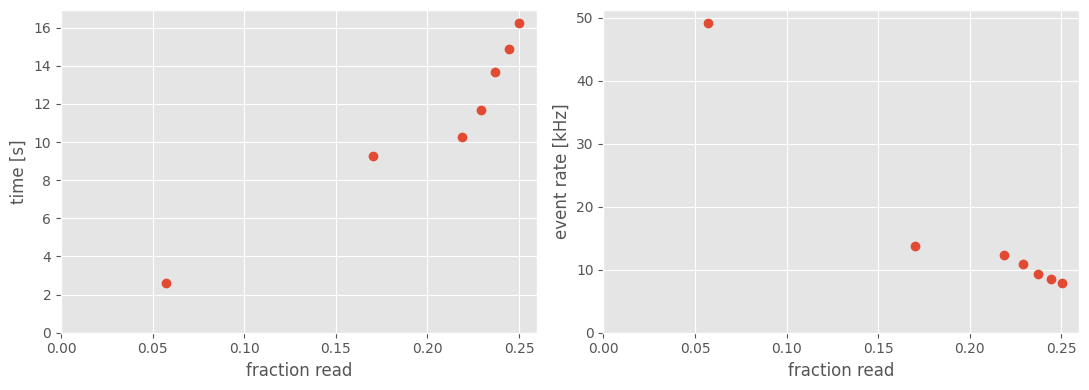

In [17]:
event_rate_in_kHz = nevts / np.fromiter(time_per_fraction_read.values(), np.float32) / 1_000

fig, (ax0, ax1) = plt.subplots(figsize=(11,4), ncols=2)

ax0.plot(time_per_fraction_read.keys(), time_per_fraction_read.values(), "o")
ax0.set_xlabel("fraction read")
ax0.set_ylabel("time [s]")
ax0.set_xlim([0, ax0.get_xlim()[1]])
ax0.set_ylim([0, ax0.get_ylim()[1]])

ax1.plot(time_per_fraction_read.keys(), event_rate_in_kHz, "o")
ax1.set_xlabel("fraction read")
ax1.set_ylabel("event rate [kHz]")
ax1.set_xlim([0, ax1.get_xlim()[1]])
ax1.set_ylim([0, ax1.get_ylim()[1]])

figures_dir = Path.cwd() / "figures"
figures_dir.mkdir(exist_ok=True)

fig.tight_layout()
fig.savefig(figures_dir / "file_read_time.png", dpi=300)

In [18]:
# pure "metadata" (?) part, would be read on every open call
with uproot.open({fname: treename}) as f:
    print(f"{f.file.source.num_requested_bytes/1000**2:.2f} MB")

2.26 MB


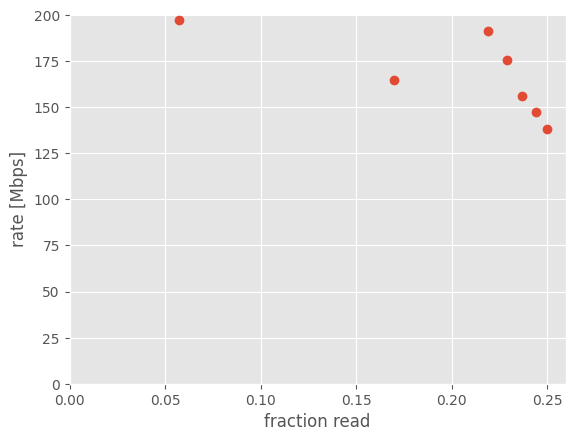

In [19]:
# fraction read * file size (in MB) * 8 (to Mb) / time (in s)
io_in_Mbps = np.fromiter(time_per_fraction_read.keys(), np.float32) * file_size * 8 / np.fromiter(time_per_fraction_read.values(), np.float32)

fig, ax = plt.subplots()

ax.plot(time_per_fraction_read.keys(), io_in_Mbps, "o")
ax.set_xlabel("fraction read")
ax.set_ylabel("rate [Mbps]")
ax.set_xlim([0, ax.get_xlim()[1]])
ax.set_ylim([0, ax.get_ylim()[1]])

fig.savefig(figures_dir / "file_read_rate.png", dpi=300)